In [45]:
import pandas as pd
import plotly.express as px
from scipy import stats
from patsy import dmatrices
import statsmodels.api as sm
import seaborn as sns


In [3]:
data = pd.read_csv('flatfiles/femaleMiceWeights.csv')

In [8]:
px.scatter(data, x='Diet', y='Bodyweight')

In [23]:
data

,Diet,Bodyweight
0,chow,21.51
1,chow,28.14
2,chow,24.04
3,chow,23.45
4,chow,23.68
5,chow,19.79
6,chow,28.40
7,chow,20.98
8,chow,22.51
9,chow,20.10


In [37]:
#can perform a simple ttest to see what are the differences between the two population
tt = stats.ttest_ind(data[data['Diet']=='hf']['Bodyweight'].to_list(),
                      data[data['Diet']=='chow']['Bodyweight'].to_list(), equal_var=False)

<AxesSubplot:xlabel='Bodyweight', ylabel='Bodyweight'>

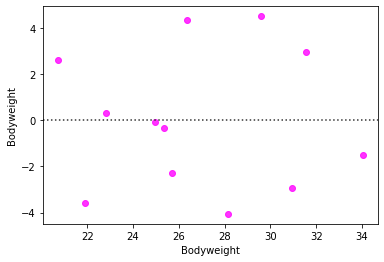

In [48]:
sns.residplot(data[data['Diet']=='hf']['Bodyweight'], 
              data[data['Diet']=='chow']['Bodyweight'], color='magenta')

In [44]:
tt.pvalue

0.05299887874532348

In [27]:
y, X = dmatrices('Bodyweight ~ Diet', data=data, return_type='dataframe')

In [35]:
X.head()

,Intercept,Diet[T.hf]
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [31]:
#Note: assuming that the std deviation are the same between the two groups
mod = sm.OLS(y, X)

In [32]:
res = mod.fit()

In [33]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             Bodyweight   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     4.224
Date:                Sun, 22 Aug 2021   Prob (F-statistic):             0.0519
Time:                        16:22:08   Log-Likelihood:                -63.756
No. Observations:                  24   AIC:                             131.5
Df Residuals:                      22   BIC:                             133.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.8133      1.039     22.912      0.0

In [ ]:
# P> |t| is the p-value
# coef -> Intercept is the 0 intercept of that linear fit (least square estimates)
#   for all others its the amount of change that variable affects the indpendent variable (y) (ie. m in y = mx + b)
#   positive means positive correlation with the independent varible and negative is negative correlation
# std err -> standard error of the coefficients
# t -> prescision of the coefficient measurement, high coef vs low std err produces a high t and gives us confidence 
#   in the results (estimate - std error)
# last two are thre 95% confidence intervals (2 std deviations)